# NLTK.VADER_LEXICON

In [147]:
import pandas as pd

df = pd.read_csv("dataset_italianoEinglese_martina.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
0,0,0,17-05-2023,1658980398242713603,@SibillaDavid Infatti ChatGPT ogni tanto si la...,katiadiluna16,1,it,1,"[User(username='SibillaDavid', id=159558223479...",[]
1,1,1,17-05-2023,1658978881783701504,@katiadiluna16 Sono peggio di ChatGPT,SibillaDavid,1,it,1,"[User(username='katiadiluna16', id=3669961223,...",[]
2,2,2,17-05-2023,1658976280086233089,@northern_mr Oggi basta chiederlo a Chatgpt e ...,katiadiluna16,1,it,1,"[User(username='northern_mr', id=1485114886808...",[]
3,3,3,17-05-2023,1658959657912729602,Grazie per la tua iscrizione a #AI &amp; #Chat...,bruniverso,0,it,1,"[User(username='flavia_marzano', id=14145846, ...",['http://cdti.org/ai-chatgpt-tra-innovazione-e...
4,4,4,17-05-2023,1658958570040205313,L'intelligenza artificiale può causare danni s...,Amorne_1979,0,it,1,NaN,['https://ift.tt/V7mbhcA']


In [148]:
df = df[df['lang'] == 'en']
df.head(5)

,Unnamed: 0.1,Unnamed: 0,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
943,943,0,29-04-2023,1652462748792672257,Some of the best #AI writing assistants in 202...,farahsays01,1,en,1,"[User(username='OpenAI', id=4398626122, displa...",[]
944,944,1,29-04-2023,1652462745772597249,#RT @phocuswire: In an interview with PhocusWi...,CravenTravels,0,en,0,"[User(username='phocuswire', id=109269437, dis...",['https://bit.ly/3LtSQlB']
945,945,2,29-04-2023,1652462718920654883,"@skepoet and I discuss the internet, ChatGPT a...",ViewsParallax,4,en,0,"[User(username='skepoet', id=401715612, displa...",['https://www.patreon.com/posts/parallax-vlog-...
946,946,3,29-04-2023,1652462702219132928,The latest in #AI news.\n\nThey don’t want to ...,WhizPill,2,en,1,"[User(username='OpenAI', id=4398626122, displa...",[]
947,947,4,29-04-2023,1652462667003568129,"@Lyle_AI Well said, its those of us on the fro...",Luc_AI_Insights,0,en,0,"[User(username='Lyle_AI', id=165422263, displa...",[]


In [149]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace= True)


## Preprocessing

In [150]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import re
from string import punctuation #ho aggiunto questo import per vedere se funziona
def clean_data(review):
    
    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)

df['tweeText'] = df['tweetText'].apply(clean_data)


In [51]:
stop_words = set(stopwords.words('english'))  # Import english stop words
df['tweeText'] = df['tweeText'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))  # Remove stop words

In [151]:
#stop_words 

## Sentiment analysis

In [152]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [153]:
df['Sentiment'] = ''
for index, row in df.iterrows():
    comment = row['tweeText']
    
    # Applica VADER all'attuale commento
    scores = sia.polarity_scores(comment)
    compound_score = scores['compound']
    
    # Assegna un'etichetta di sentiment in base al punteggio compound
    if compound_score > 0:
        sentiment = 'pos'
    elif compound_score < 0:
        sentiment = 'neg'
    else:
        sentiment = 'neu'
    
    # Assegna l'etichetta di sentiment al DataFrame
    df.at[index, 'Sentiment'] = sentiment

# Stampa il DataFrame con le nuove etichette di sentiment
df['Sentiment'].value_counts()

pos    13003
neu     7318
neg     4643
Name: Sentiment, dtype: int64

## Sentiment distribution

In [154]:
sizes = df["Sentiment"].value_counts()
labels = df["Sentiment"].unique()

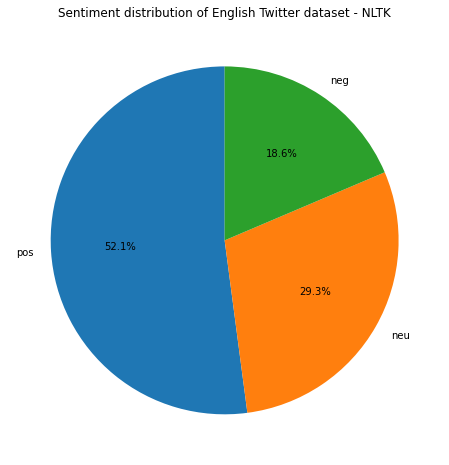

In [156]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.title("Sentiment distribution of English Twitter dataset - NLTK")
#plt.savefig("pie_nltksentiment-complete.png")
plt.show()

# Words, bigrams and trigrams distribution for positive comments


In [158]:
df = df[df['Sentiment']== 'pos']
df.head(5)

,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks,tweeText,Sentiment
943,29-04-2023,1652462748792672257,Some of the best #AI writing assistants in 202...,farahsays01,1,en,1,"[User(username='OpenAI', id=4398626122, displa...",[],Some of the best AI writing assistants in are...,pos
947,29-04-2023,1652462667003568129,"@Lyle_AI Well said, its those of us on the fro...",Luc_AI_Insights,0,en,0,"[User(username='Lyle_AI', id=165422263, displa...",[],Lyle_AI Well said its those of us on the front...,pos
948,29-04-2023,1652462586531643398,Wow! Why chatGPT can know the latest shopping ...,TONYAKU65002744,1,en,1,NaN,[],Wow Why chatGPT can know the latest shopping a...,pos
949,29-04-2023,1652462515077410818,@GolfChannel @MexicoOpenGolf @PenskeNews that ...,duckyevans,1,en,0,"[User(username='GolfChannel', id=28349128, dis...",[],GolfChannel MexicoOpenGolf PenskeNews that man...,pos
952,29-04-2023,1652462335439536130,"Everyone keeps saying: ""Try ChatGPT it's amazi...",playwithmiki,7,en,0,NaN,[],Everyone keeps saying Try ChatGPT its amazing ...,pos


In [159]:
# Download delle stopwords se necessario
#nltk.download('stopwords')


import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import re
from string import punctuation

def clean_data(review):
    
    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)

df['tweeText'] = df['tweetText'].apply(clean_data)


In [160]:
stop_words = set(stopwords.words('english'))  # Import english stop words
df['tweeText'] = df['tweeText'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))  # Remove stop words

text = ' '.join(df['tweetText'])
text

tokens = word_tokenize(text.lower())
tokens = [token for token in tokens if token not in stopwords.words('english') and token not in punctuation]
tokens

In [162]:
#df_copy = df.copy()
#df = df[df['Sentiment'] == 'pos']
df.tail(4)

,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks,tweeText,Sentiment
26998,29-05-2023,1663049815809224704,Excellent thread summarizing an important pape...,arielbeery,0,en,1,NaN,[],Excellent thread summarizing important paper o...,pos
26999,29-05-2023,1663049685324398593,idk abt u guys but im telling chatgpt thank yo...,gooddaymp3,2,en,1,NaN,[],idk abt u guys im telling chatgpt thank good d...,pos
27001,29-05-2023,1663049602851807232,@ivy_wylder @ask_aubry I’ve been looking for s...,dan_dd,6,en,0,"[User(username='ivy_wylder', id=12147283985404...",[],ivy_wylder ask_aubry Ive looking creative yet ...,pos
27003,29-05-2023,1663049350560514050,@shotgun2thehead chatgpt is really good people...,teengoatmance,1,en,1,"[User(username='shotgun2thehead', id=257651288...",[],shotgunthehead chatgpt really good people act ...,pos


## Words frequency

# Codice di Claudio originale
from nltk import FreqDist

tokens = []
for row in df['tweetText']:
    tokens.extend(word_tokenize(str(row).lower()))  # Tokenization and lower conversion of the strings

word_freq = FreqDist(tokens)
sorted_freq = sorted(word_freq.items(), key = lambda x: x[1], reverse = True)

In [163]:
from nltk import FreqDist
import string

tokens = []
for row in df['tweetText']:
    words = word_tokenize(str(row).lower())
    tokens.extend([word for word in words if word.isalpha()])  # Aggiunta della condizione di isalpha() per eliminare punteggiatura
    
word_freq = FreqDist(tokens)
sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [164]:
N = 50  # number of frequent words to print
for word, freq in sorted_freq[:N]:
    print(word, freq)

chatgpt 12599
the 12323
to 11239
and 8465
a 8140
https 6713
of 6121
it 6098
i 5585
is 5079
for 4843
you 4537
in 4496
ai 4344
with 3510
that 3431
on 2841
this 2637
your 2393
can 2272
be 1906
like 1891
are 1794
but 1651
as 1644
have 1569
my 1508
how 1497
by 1391
we 1383
not 1365
do 1344
what 1313
an 1255
more 1240
me 1236
chat 1222
or 1220
gpt 1206
use 1198
about 1177
at 1170
from 1162
if 1159
will 1143
just 1131
so 1016
using 1009
was 979
s 963


In [165]:
## Bigrams distribution

In [166]:
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

finder = BigramCollocationFinder.from_words(tokens)

In [167]:
bigram_freq = finder.ngram_fd
sorted_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

In [168]:
N = 50
for ngram, freq in sorted_freq[:N]:
    print(ngram, freq)

('chat', 'gpt') 977
('in', 'the') 925
('of', 'the') 866
('chatgpt', 'is') 866
('chatgpt', 'to') 843
('chatgpt', 'and') 608
('with', 'chatgpt') 593
('https', 'https') 560
('https', 'chatgpt') 516
('if', 'you') 491
('is', 'a') 490
('chatgpt', 'https') 481
('of', 'chatgpt') 467
('you', 'can') 462
('for', 'the') 443
('to', 'the') 438
('on', 'the') 434
('how', 'to') 425
('chatgpt', 'for') 413
('to', 'be') 411
('using', 'chatgpt') 392
('it', 'is') 389
('this', 'is') 378
('to', 'use') 364
('like', 'chatgpt') 357
('use', 'chatgpt') 350
('with', 'the') 349
('to', 'chatgpt') 349
('it', 's') 347
('as', 'a') 326
('ai', 'chatgpt') 312
('chatgpt', 'can') 304
('is', 'the') 302
('and', 'the') 295
('for', 'a') 291
('to', 'create') 289
('in', 'a') 288
('chatgpt', 'plus') 286
('want', 'to') 281
('to', 'make') 278
('https', 'i') 277
('to', 'write') 275
('the', 'best') 273
('artificial', 'intelligence') 264
('and', 'it') 258
('i', 'asked') 255
('asked', 'chatgpt') 254
('it', 'to') 252
('to', 'help') 246
('

## Trigrams distribution

In [169]:
finder = TrigramCollocationFinder.from_words(tokens)
trigram_freq = finder.ngram_fd
sorted_freq = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)

In [170]:
N = 50
for ngram, freq in sorted_freq[:N]:
    print(ngram, freq)

('on', 'hand', 'netflix') 212
('hand', 'netflix', 'quillbot') 212
('netflix', 'quillbot', 'chatgpt') 212
('quillbot', 'chatgpt', 'plus') 212
('i', 'asked', 'chatgpt') 167
('to', 'use', 'chatgpt') 133
('use', 'chatgpt', 'to') 129
('a', 'lot', 'of') 126
('asked', 'chatgpt', 'to') 126
('chatgpt', 'to', 'write') 121
('how', 'to', 'use') 113
('using', 'chatgpt', 'to') 109
('chatgpt', 'is', 'a') 98
('chat', 'gpt', 'is') 92
('https', 'chatgpt', 'is') 89
('one', 'of', 'the') 89
('the', 'power', 'of') 84
('the', 'future', 'of') 84
('to', 'create', 'a') 82
('chatgpt', 'to', 'help') 74
('you', 'want', 'to') 74
('chatgpt', 'plus', 'on') 74
('plus', 'on', 'hand') 74
('chat', 'gpt', 'to') 71
('to', 'write', 'a') 69
('chatgpt', 'to', 'create') 67
('be', 'able', 'to') 65
('you', 'can', 'use') 64
('used', 'chatgpt', 'to') 64
('click', 'here', 'https') 63
('to', 'help', 'you') 61
('you', 'need', 'to') 59
('the', 'temu', 'invitation') 59
('temu', 'invitation', 'code') 59
('can', 'help', 'you') 59
('ask',

Main reasons we can deduce from the above list of trigraphs are: **AI potential (as investment for the future technology)**, **it outperforms physicians (?)**.

# Words, bigrams and trigrams distribution for negative comments

In [171]:
df = pd.read_csv("dataset_italianoEinglese_martina.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
0,0,0,17-05-2023,1658980398242713603,@SibillaDavid Infatti ChatGPT ogni tanto si la...,katiadiluna16,1,it,1,"[User(username='SibillaDavid', id=159558223479...",[]
1,1,1,17-05-2023,1658978881783701504,@katiadiluna16 Sono peggio di ChatGPT,SibillaDavid,1,it,1,"[User(username='katiadiluna16', id=3669961223,...",[]
2,2,2,17-05-2023,1658976280086233089,@northern_mr Oggi basta chiederlo a Chatgpt e ...,katiadiluna16,1,it,1,"[User(username='northern_mr', id=1485114886808...",[]
3,3,3,17-05-2023,1658959657912729602,Grazie per la tua iscrizione a #AI &amp; #Chat...,bruniverso,0,it,1,"[User(username='flavia_marzano', id=14145846, ...",['http://cdti.org/ai-chatgpt-tra-innovazione-e...
4,4,4,17-05-2023,1658958570040205313,L'intelligenza artificiale può causare danni s...,Amorne_1979,0,it,1,NaN,['https://ift.tt/V7mbhcA']


In [173]:
df = df[df['lang'] == 'en']
df.head(3)

,Unnamed: 0.1,Unnamed: 0,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks
943,943,0,29-04-2023,1652462748792672257,Some of the best #AI writing assistants in 202...,farahsays01,1,en,1,"[User(username='OpenAI', id=4398626122, displa...",[]
944,944,1,29-04-2023,1652462745772597249,#RT @phocuswire: In an interview with PhocusWi...,CravenTravels,0,en,0,"[User(username='phocuswire', id=109269437, dis...",['https://bit.ly/3LtSQlB']
945,945,2,29-04-2023,1652462718920654883,"@skepoet and I discuss the internet, ChatGPT a...",ViewsParallax,4,en,0,"[User(username='skepoet', id=401715612, displa...",['https://www.patreon.com/posts/parallax-vlog-...


In [174]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [175]:
df['Sentiment'] = ''
for index, row in df.iterrows():
    comment = row['tweetText']
    
    # Applica VADER all'attuale commento
    scores = sia.polarity_scores(comment)
    compound_score = scores['compound']
    
    # Assegna un'etichetta di sentiment in base al punteggio compound
    if compound_score > 0:
        sentiment = 'pos'
    elif compound_score < 0:
        sentiment = 'neg'
    else:
        sentiment = 'neu'
    
    # Assegna l'etichetta di sentiment al DataFrame
    df.at[index, 'Sentiment'] = sentiment

# Stampa il DataFrame con le nuove etichette di sentiment
df['Sentiment'].value_counts()

pos    12835
neu     7659
neg     4470
Name: Sentiment, dtype: int64

In [176]:
sizes = df["Sentiment"].value_counts()
labels = df["Sentiment"].unique()

In [177]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks,Sentiment
943,943,0,29-04-2023,1652462748792672257,Some of the best #AI writing assistants in 202...,farahsays01,1,en,1,"[User(username='OpenAI', id=4398626122, displa...",[],pos
944,944,1,29-04-2023,1652462745772597249,#RT @phocuswire: In an interview with PhocusWi...,CravenTravels,0,en,0,"[User(username='phocuswire', id=109269437, dis...",['https://bit.ly/3LtSQlB'],neu
945,945,2,29-04-2023,1652462718920654883,"@skepoet and I discuss the internet, ChatGPT a...",ViewsParallax,4,en,0,"[User(username='skepoet', id=401715612, displa...",['https://www.patreon.com/posts/parallax-vlog-...,neg
946,946,3,29-04-2023,1652462702219132928,The latest in #AI news.\n\nThey don’t want to ...,WhizPill,2,en,1,"[User(username='OpenAI', id=4398626122, displa...",[],neg
947,947,4,29-04-2023,1652462667003568129,"@Lyle_AI Well said, its those of us on the fro...",Luc_AI_Insights,0,en,0,"[User(username='Lyle_AI', id=165422263, displa...",[],pos


In [178]:
#df = df_copy
df = df[df['Sentiment'] == 'neg']
df.head(5)

,Unnamed: 0.1,Unnamed: 0,date,id,tweetText,user,likeCount,lang,replies,mentions,outlinks,Sentiment
945,945,2,29-04-2023,1652462718920654883,"@skepoet and I discuss the internet, ChatGPT a...",ViewsParallax,4,en,0,"[User(username='skepoet', id=401715612, displa...",['https://www.patreon.com/posts/parallax-vlog-...,neg
946,946,3,29-04-2023,1652462702219132928,The latest in #AI news.\n\nThey don’t want to ...,WhizPill,2,en,1,"[User(username='OpenAI', id=4398626122, displa...",[],neg
950,950,7,29-04-2023,1652462487009198083,@RogerJBaker @heyitsalexsu @ItsMattsLaw Releva...,LizCGil,5,en,1,"[User(username='RogerJBaker', id=28812457, dis...",[],neg
959,959,16,29-04-2023,1652462022376693760,ChatGPT Ban Lifted: OpenAI Complies With Itali...,ContentTop25,0,en,0,"[User(username='sejournal', id=14113411, displ...",['https://seoy.es/3Zx0CZFC'],neg
963,963,20,29-04-2023,1652461952948477952,I suppose this works if you do less than 25 se...,carmelyne,0,en,1,NaN,[],neg


## Words frequency

In [179]:
from nltk import FreqDist
import string

tokens = []
for row in df['tweetText']:
    words = word_tokenize(str(row).lower())
    tokens.extend([word for word in words if word.isalpha()])  # Aggiunta della condizione di isalpha() per eliminare punteggiatura
    
word_freq = FreqDist(tokens)
sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [180]:
N = 50  # number of frequent words to print
for word, freq in sorted_freq[:N]:
    print(word, freq) # Bigrams distribution

chatgpt 4176
the 3751
to 3340
a 2399
and 2338
it 2163
i 2094
https 2042
of 1953
is 1950
in 1497
ai 1283
you 1253
for 1229
that 1202
with 955
on 889
this 849
not 785
are 702
but 663
be 611
can 559
as 537
do 522
your 511
have 505
or 497
about 477
no 475
chat 469
gpt 463
if 461
my 460
how 459
s 451
what 436
so 422
from 419
will 415
was 410
me 406
they 405
just 403
an 402
by 400
using 368
has 362
at 359
we 342


## Bigrams distribution

In [181]:
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

finder = BigramCollocationFinder.from_words(tokens)

In [182]:
bigram_freq = finder.ngram_fd
sorted_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

In [183]:
N = 50
for ngram, freq in sorted_freq[:N]:
    print(ngram, freq) # Trigrams distribution

('chat', 'gpt') 416
('chatgpt', 'is') 354
('chatgpt', 'to') 295
('in', 'the') 294
('of', 'the') 249
('using', 'chatgpt') 181
('chatgpt', 'and') 176
('if', 'you') 164
('this', 'is') 160
('it', 's') 158
('is', 'a') 148
('on', 'chatgpt') 148
('https', 'chatgpt') 146
('on', 'the') 146
('to', 'be') 144
('with', 'chatgpt') 139
('of', 'chatgpt') 137
('to', 'the') 136
('it', 'is') 133
('https', 'https') 131
('chatgpt', 'for') 129
('to', 'write') 121
('chatgpt', 'https') 120
('for', 'the') 114
('is', 'not') 114
('how', 'to') 109
('is', 'the') 108
('in', 'a') 105
('and', 'it') 105
('https', 'i') 104
('use', 'chatgpt') 103
('you', 'can') 101
('i', 'have') 100
('it', 'to') 99
('i', 'asked') 95
('you', 'are') 94
('chatgpt', 'in') 94
('for', 'a') 92
('asked', 'chatgpt') 91
('i', 'am') 90
('to', 'do') 89
('to', 'get') 89
('with', 'the') 87
('and', 'the') 87
('and', 'i') 86
('as', 'a') 85
('to', 'chatgpt') 85
('i', 'do') 84
('by', 'chatgpt') 83
('to', 'make') 78


## Trigrams distribution

In [184]:
finder = TrigramCollocationFinder.from_words(tokens)
trigram_freq = finder.ngram_fd
sorted_freq = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)

In [185]:
N = 50
for ngram, freq in sorted_freq[:N]:
    print(ngram, freq)

('chatgpt', 'to', 'write') 74
('i', 'asked', 'chatgpt') 61
('chatgpt', 'ban', 'lifted') 54
('eu', 'ai', 'act') 54
('ban', 'lifted', 'openai') 49
('lifted', 'openai', 'complies') 49
('openai', 'complies', 'with') 49
('complies', 'with', 'italian') 49
('with', 'italian', 'privacy') 49
('italian', 'privacy', 'regulations') 49
('privacy', 'regulations', 'as') 49
('regulations', 'as', 'eu') 49
('as', 'eu', 'ai') 49
('ai', 'act', 'moves') 49
('act', 'moves', 'forward') 49
('ban', 'on', 'chatgpt') 47
('to', 'write', 'a') 45
('moves', 'forward', 'via') 44
('forward', 'via', 'sejournal') 44
('using', 'chatgpt', 'to') 44
('via', 'sejournal', 'kristileilani') 43
('italy', 'lifts', 'ban') 42
('lifts', 'ban', 'on') 42
('asked', 'chatgpt', 'to') 42
('chatgpt', 'in', 'court') 42
('lawyer', 'uses', 'chatgpt') 42
('chat', 'gpt', 'to') 41
('chat', 'gpt', 'is') 41
('a', 'lot', 'of') 40
('on', 'chatgpt', 'after') 40
('chatgpt', 'after', 'data') 38
('after', 'data', 'privacy') 38
('data', 'privacy', 'impro

Main reasons we can deduce from the above list of trigraphs are: **AGCOM case in Italy for privacy issues**, **data privacy** and **AI development regulation**.